#Import all the required libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


#Read the Dataset

In [ ]:
Data = pd.read_csv('cardio_train.csv', sep = ";")
Data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#check for null values

In [ ]:
Data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#Identify all the columns in the dataset

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#Brief statisics of the dataset

In [ ]:
Data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#Renaming the api_hi with Systolic_blood_pressure, ap_lo with Diastolic_blood_pressure and active with Physical_activity

In [ ]:
Data = Data.rename(columns = {  'ap_hi' : 'Systolic_blood_pressure',  'ap_lo' : 'Diastolic_blood_pressure' , 'active' : 'Physical_activity' })
Data = Data.rename(columns = { 'alco' : 'Alcohol_intake' , 'smoke' : 'Smoking' , 'gluc' : 'Glucose' })

#seeing the summary again

In [ ]:
Data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,Smoking,Alcohol_intake,Physical_activity,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#Plotting the heatmap of dataset for co-relation between columns

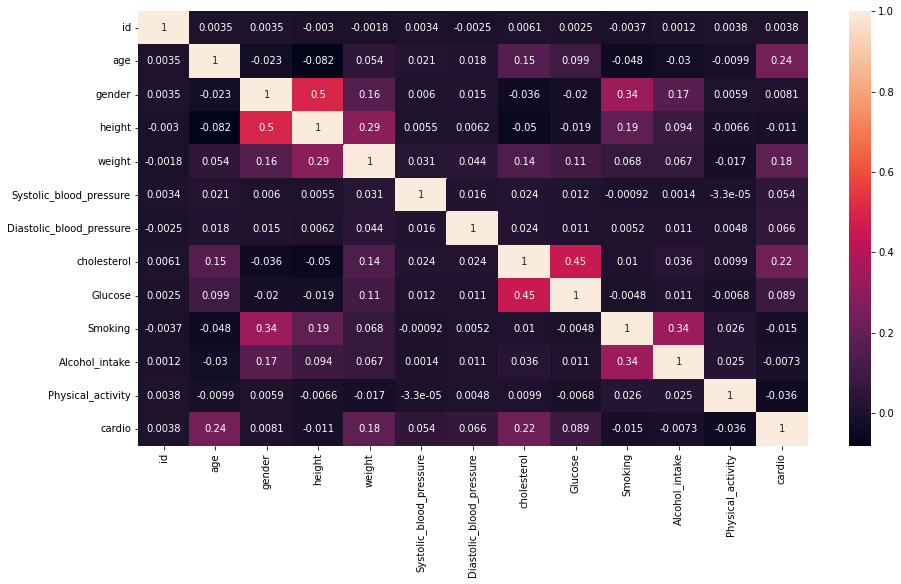

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(Data.corr(),  annot= True)

#Plot all the columns 

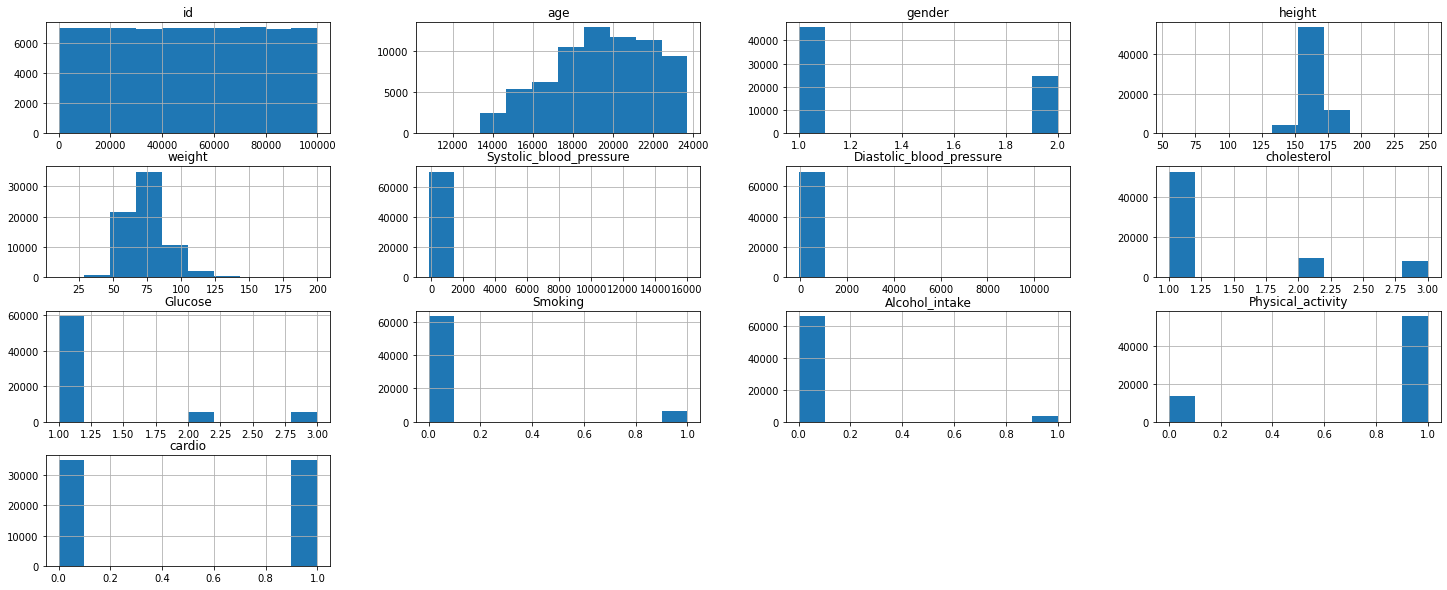

In [ ]:
Data.hist(figsize=(25,10))
plt.show()


#Plotting the cardio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    35021
1    34979
Name: cardio, dtype: int64


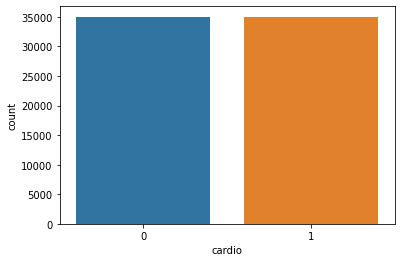

In [ ]:
y = Data["cardio"]
sns.countplot(y)
temp = Data.cardio.value_counts()
print(temp)

#Plotting gender wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    45530
2    24470
Name: gender, dtype: int64


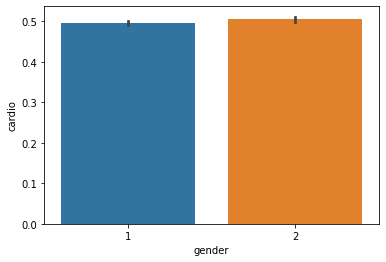

In [ ]:

sns.barplot(Data["gender"],y)
temp = Data.gender.value_counts()
print(temp)

#Plotting Cholestrol

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64


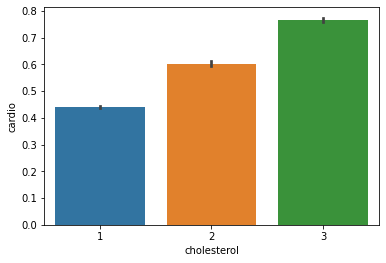

In [ ]:

sns.barplot(Data["cholesterol"],y)
temp = Data.cholesterol.value_counts()
print(temp)

#Plotting Glucose

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    59479
3     5331
2     5190
Name: Glucose, dtype: int64


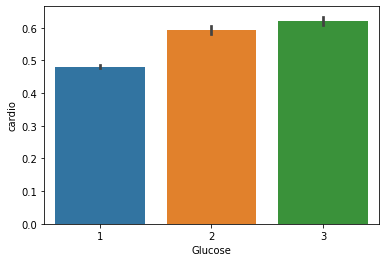

In [ ]:

sns.barplot(Data["Glucose"],y)
temp = Data.Glucose.value_counts()
print(temp)

#Plotting Smokers with Non-Smokers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    63831
1     6169
Name: Smoking, dtype: int64


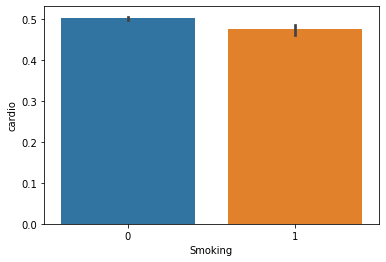

In [ ]:

sns.barplot(Data["Smoking"],y)
temp = Data.Smoking.value_counts()
print(temp)

#Plotting alcohol intakee

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    66236
1     3764
Name: Alcohol_intake, dtype: int64

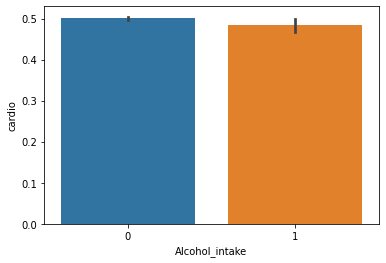

In [ ]:
sns.barplot(Data["Alcohol_intake"],y)
temp = Data.Alcohol_intake.value_counts()
temp

#Plotting physical activity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    56261
0    13739
Name: Physical_activity, dtype: int64


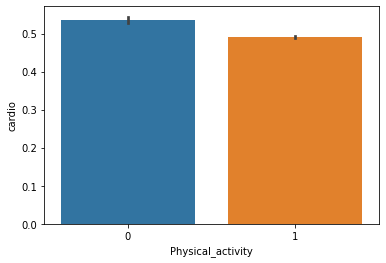

In [ ]:
sns.barplot(Data["Physical_activity"],y)
temp = Data.Physical_activity.value_counts()
print(temp)

In [ ]:
Data['age'] = round(Data['age']/365)

#Outlier Detection of Age 

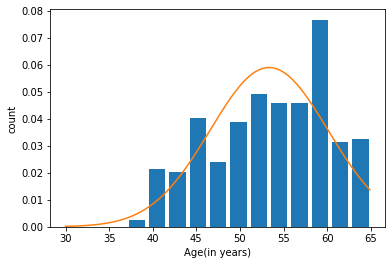

In [ ]:

from scipy.stats import norm
plt.hist(Data.age, bins = 15, rwidth = 0.8, density = True)
plt.xlabel('Age(in years)')
plt.ylabel('count')

rng = np.arange(Data.age.min(), Data.age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Data.age.mean(), Data.age.std()))


In [ ]:
upper_limit = Data.age.mean() + 3*Data.age.std()

In [ ]:
lower_limit = Data.age.mean() - 3*Data.age.std()

In [ ]:
Data[ (Data.age > upper_limit) | (Data.age < lower_limit)]

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,Smoking,Alcohol_intake,Physical_activity,cardio
6219,8850,30.0,1,175,59.0,120,80,1,1,0,0,1,0
22343,31922,30.0,2,175,92.0,100,60,1,1,0,0,1,0
30666,43842,30.0,1,159,59.0,120,80,1,1,0,0,1,0
55905,79749,30.0,1,160,59.0,110,70,1,1,0,0,1,0


In [ ]:
Data = Data[ (Data.age < upper_limit) & (Data.age  > lower_limit)]

#Brief of the Database

In [ ]:

Data.count()

id                          69996
age                         69996
gender                      69996
height                      69996
weight                      69996
Systolic_blood_pressure     69996
Diastolic_blood_pressure    69996
cholesterol                 69996
Glucose                     69996
Smoking                     69996
Alcohol_intake              69996
Physical_activity           69996
cardio                      69996
dtype: int64

#Outlier Detection of Height

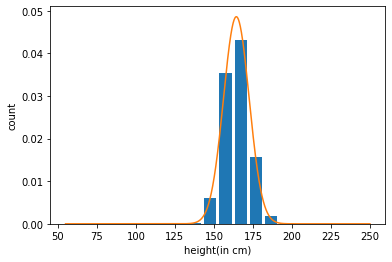

In [ ]:

plt.hist(Data.height, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('height(in cm)')
plt.ylabel('count')

rng = np.arange(Data.height.min(), Data.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Data.height.mean(), Data.height.std()))


In [ ]:
upper_limit = Data.height.mean() + 3*Data.height.std()
lower_limit = Data.height.mean() - 3*Data.height.std()

In [ ]:
Data[ (Data.height > upper_limit) | (Data.height < lower_limit)]

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,Smoking,Alcohol_intake,Physical_activity,cardio
224,309,60.0,2,76,55.0,120,80,1,1,0,0,1,0
1027,1432,42.0,2,195,111.0,148,86,1,1,0,0,1,1
1117,1554,61.0,2,198,68.0,120,80,1,1,0,0,1,1
2160,3049,44.0,2,196,74.0,140,90,1,1,1,1,1,1
2412,3399,62.0,2,138,52.0,140,100,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67972,97080,60.0,2,195,90.0,120,80,1,1,0,0,0,0
69052,98630,56.0,2,120,80.0,140,90,1,2,0,0,1,1
69124,98728,44.0,2,138,60.0,110,80,1,1,0,0,0,0
69216,98862,60.0,1,190,87.0,120,80,1,1,0,0,0,0


In [ ]:
Data = Data[ (Data.height < upper_limit) & (Data.height  > lower_limit)]

#Outlier Detection of Weight

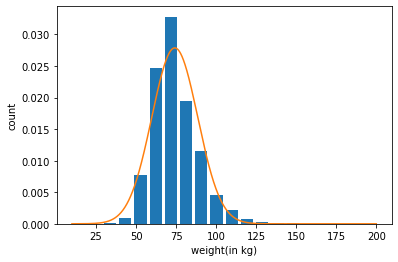

In [ ]:

plt.hist(Data.weight, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('weight(in kg)')
plt.ylabel('count')

rng = np.arange(Data.weight.min(), Data.weight.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Data.weight.mean(), Data.weight.std()))


In [ ]:
upper_limit = Data.weight.mean() + 3*Data.weight.std()
lower_limit = Data.weight.mean() - 3*Data.weight.std()

In [ ]:
Data[ (Data.weight > upper_limit) | (Data.weight < lower_limit)]

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,Smoking,Alcohol_intake,Physical_activity,cardio
338,474,58.0,1,157,142.0,120,80,1,1,0,0,1,1
389,552,46.0,2,165,169.0,120,80,1,1,0,0,1,0
435,618,46.0,1,186,200.0,130,70,1,1,0,0,0,0
446,634,58.0,2,178,120.0,160,90,1,3,0,0,1,1
591,846,40.0,1,164,125.0,130,90,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69012,98584,50.0,1,170,123.0,130,90,1,1,0,0,1,0
69060,98640,52.0,1,163,119.0,160,90,1,1,0,0,1,1
69109,98709,52.0,2,175,155.0,110,100,1,1,0,0,1,1
69440,99182,63.0,2,180,123.0,190,99,2,1,0,0,0,1


In [ ]:
Data = Data[ (Data.weight < upper_limit) & (Data.weight  > lower_limit)]

In [ ]:
Data.count()

id                          69024
age                         69024
gender                      69024
height                      69024
weight                      69024
Systolic_blood_pressure     69024
Diastolic_blood_pressure    69024
cholesterol                 69024
Glucose                     69024
Smoking                     69024
Alcohol_intake              69024
Physical_activity           69024
cardio                      69024
dtype: int64

In [ ]:
Data.drop(Data.query('Systolic_blood_pressure >180 or Diastolic_blood_pressure >160 or Systolic_blood_pressure<60 or Diastolic_blood_pressure<60').index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Data.count()

id                          67444
age                         67444
gender                      67444
height                      67444
weight                      67444
Systolic_blood_pressure     67444
Diastolic_blood_pressure    67444
cholesterol                 67444
Glucose                     67444
Smoking                     67444
Alcohol_intake              67444
Physical_activity           67444
cardio                      67444
dtype: int64

#Converting Categorial Varibale into Binary form

In [ ]:
Data.insert(3, "female", (Data['gender']==1).astype(int))
Data.insert(4, 'male', (Data['gender']==2).astype(int))

In [ ]:
Data.insert(9, "Glucose_Normal" , (Data['Glucose']==1).astype(int))
Data.insert(10, "Glucose_above_normal" , (Data['Glucose']==2).astype(int))
Data.insert(11, "Glucose_excess" , (Data['Glucose']==3).astype(int))

In [ ]:
Data.insert(12, "cholestrol_normal" , (Data['cholesterol']==1).astype(int))
Data.insert(13, "cholestrol_above_normal" , (Data['cholesterol']==2).astype(int))
Data.insert(14, "cholestrol_excess_normal" , (Data['cholesterol']==3).astype(int))

#Droping Extra Column

In [ ]:
Data.drop(['gender', 'id' , 'cholesterol' , 'Glucose'], axis=1, inplace = True)

In [ ]:
Data.drop(['female', 'Glucose_excess' , 'cholestrol_excess_normal' ], axis=1, inplace = True)

In [ ]:
Data = Data.rename(columns = { 'male' : 'Gender' })

In [ ]:
Data

,age,Gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,Glucose_Normal,Glucose_above_normal,cholestrol_normal,cholestrol_above_normal,Smoking,Alcohol_intake,Physical_activity,cardio
0,50.0,1,168,62.0,110,80,1,0,1,0,0,0,1,0
1,55.0,0,156,85.0,140,90,1,0,0,0,0,0,1,1
2,52.0,0,165,64.0,130,70,1,0,0,0,0,0,0,1
3,48.0,1,169,82.0,150,100,1,0,1,0,0,0,1,1
4,48.0,0,156,56.0,100,60,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58.0,0,165,80.0,150,80,1,0,1,0,0,0,1,1
69995,53.0,1,168,76.0,120,80,1,0,1,0,1,0,1,0
69997,52.0,1,183,105.0,180,90,1,0,0,0,0,1,0,1
69998,61.0,0,163,72.0,135,80,0,1,1,0,0,0,0,1


#Using the pairplot

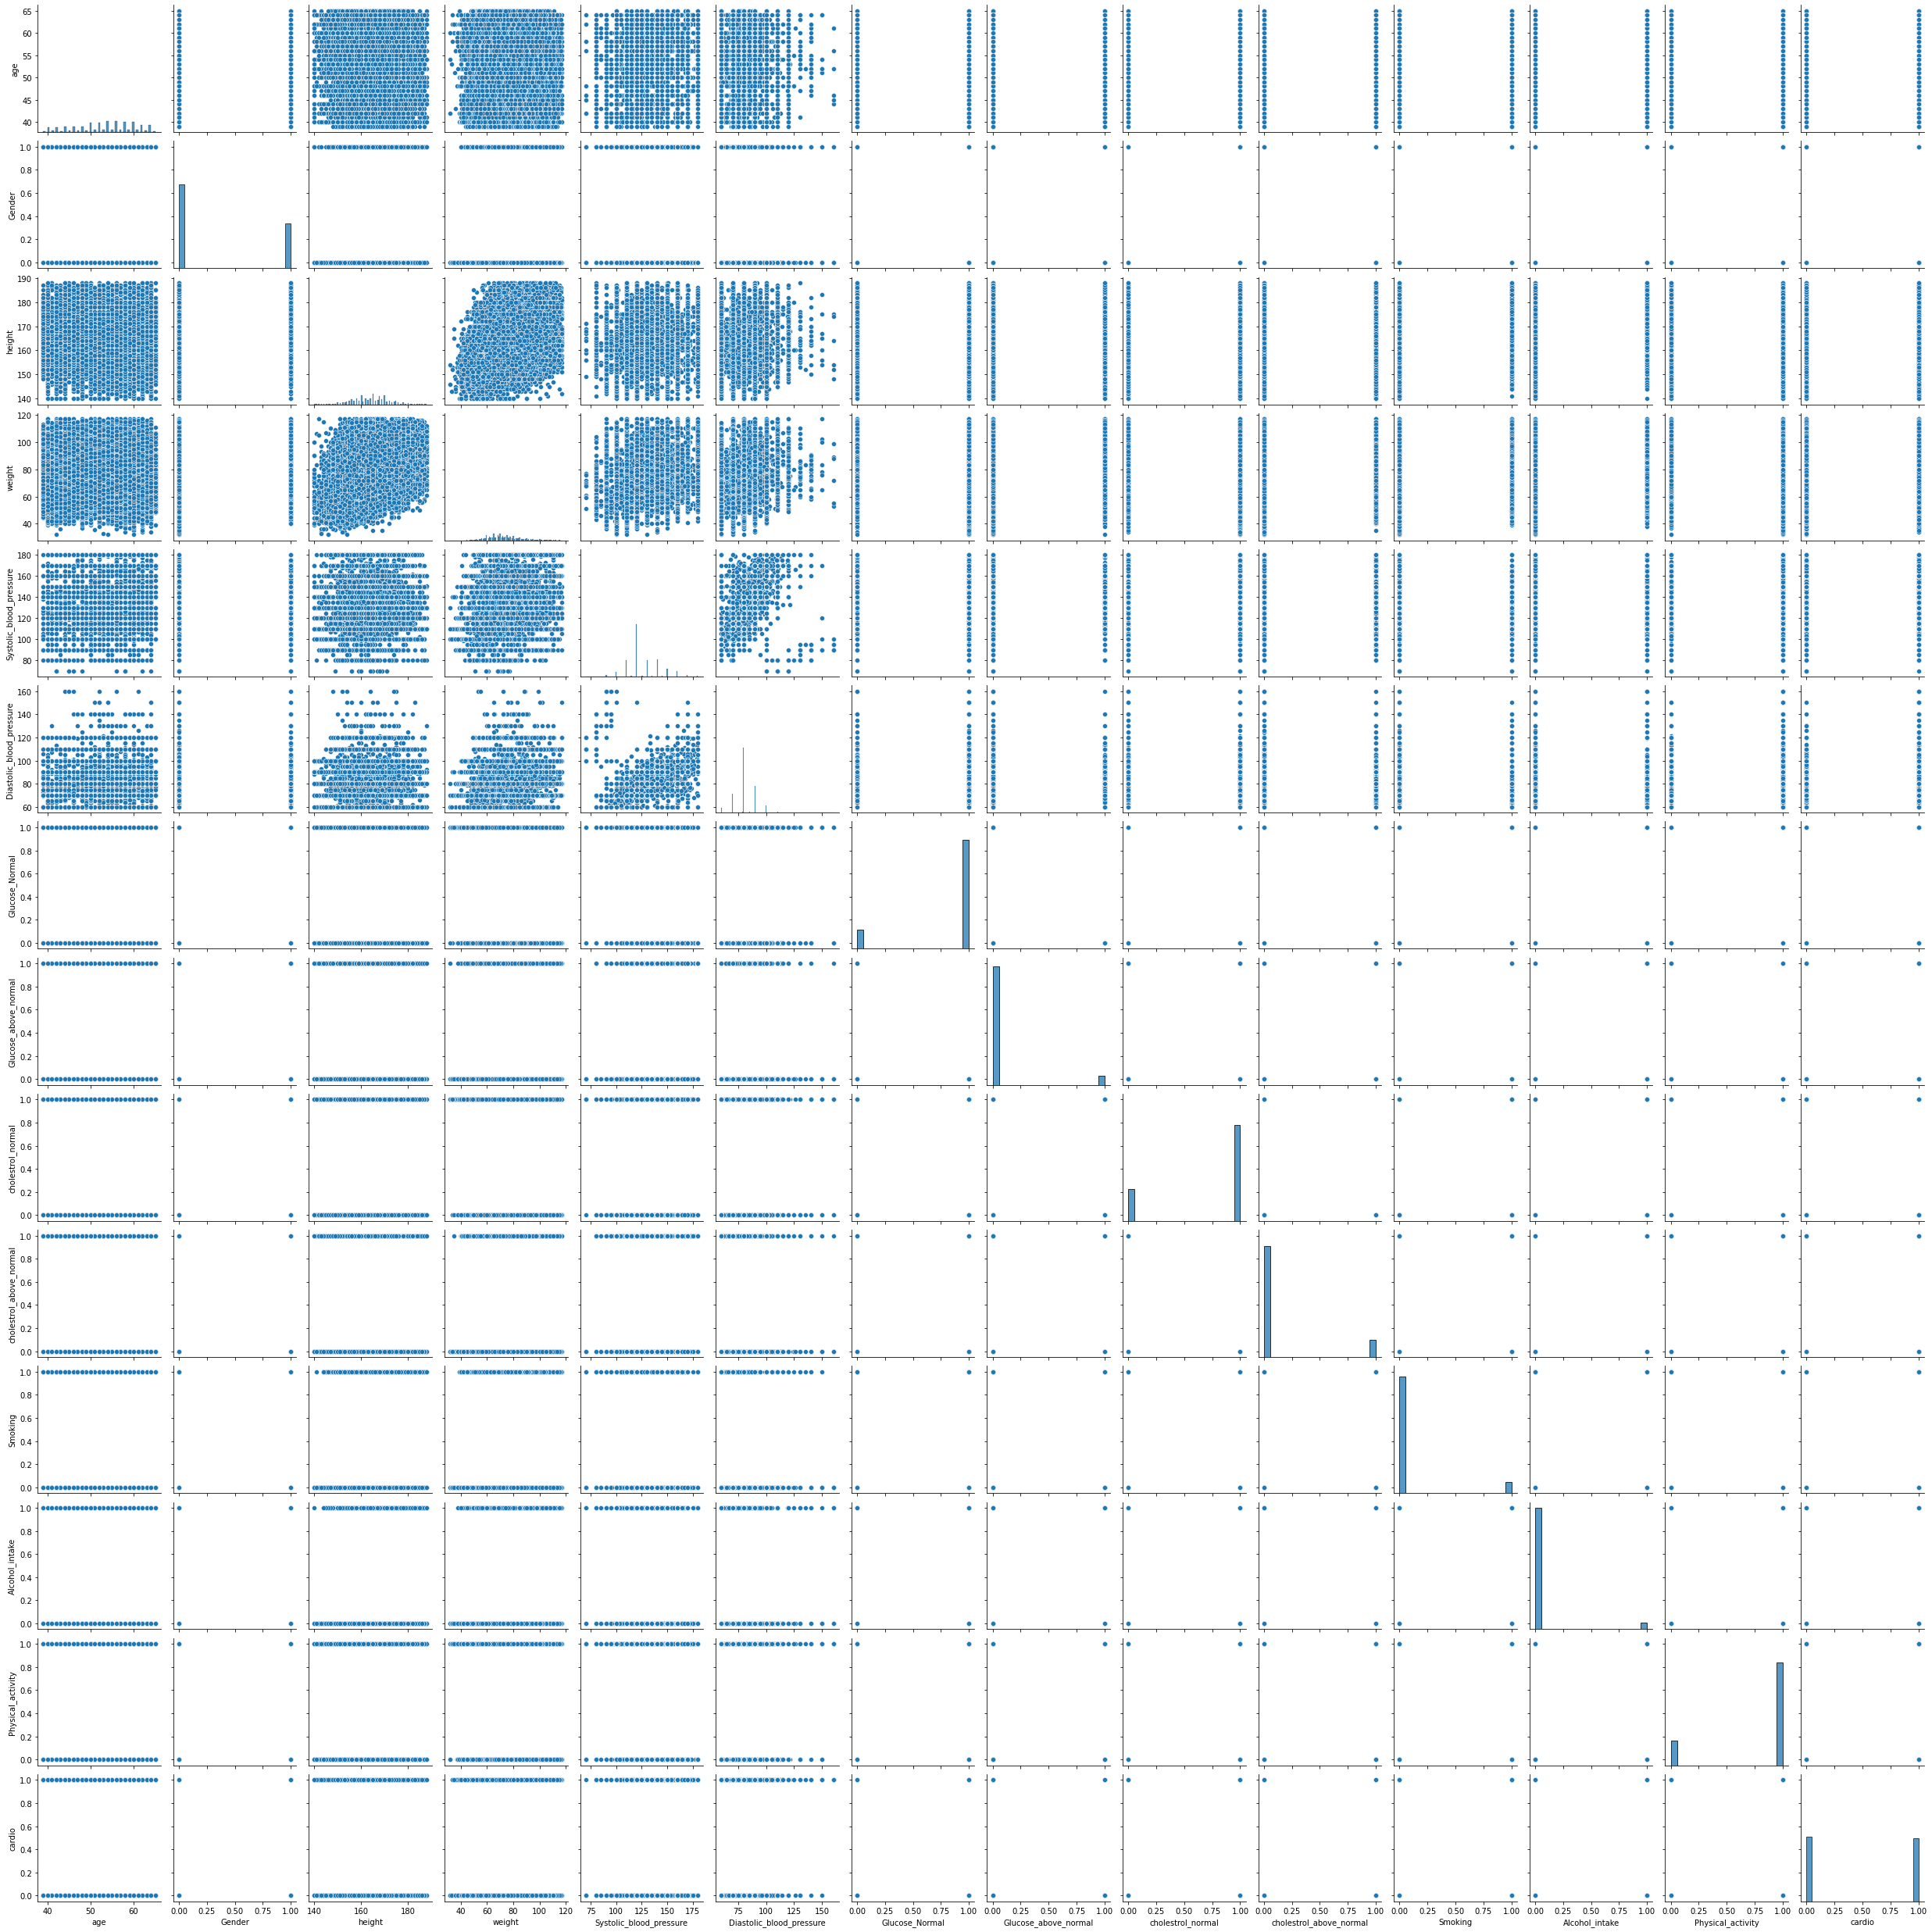

In [ ]:
sns.pairplot(Data)

In [ ]:
Data.head(30)

,age,Gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,Glucose_Normal,Glucose_above_normal,cholestrol_normal,cholestrol_above_normal,Smoking,Alcohol_intake,Physical_activity,cardio
0,50.0,1,168,62.0,110,80,1,0,1,0,0,0,1,0
1,55.0,0,156,85.0,140,90,1,0,0,0,0,0,1,1
2,52.0,0,165,64.0,130,70,1,0,0,0,0,0,0,1
3,48.0,1,169,82.0,150,100,1,0,1,0,0,0,1,1
4,48.0,0,156,56.0,100,60,1,0,1,0,0,0,0,0
5,60.0,0,151,67.0,120,80,0,1,0,1,0,0,0,0
6,61.0,0,157,93.0,130,80,1,0,0,0,0,0,1,0
7,62.0,1,178,95.0,130,90,0,0,0,0,0,0,1,1
8,48.0,0,158,71.0,110,70,1,0,1,0,0,0,1,0
9,54.0,0,164,68.0,110,60,1,0,1,0,0,0,0,0


#Converting Dataset Into X and Y variable

In [ ]:
X = Data.iloc[:, :-1].values
X

array([[ 50.,   1., 168., ...,   0.,   0.,   1.],
       [ 55.,   0., 156., ...,   0.,   0.,   1.],
       [ 52.,   0., 165., ...,   0.,   0.,   0.],
       ...,
       [ 52.,   1., 183., ...,   0.,   1.,   0.],
       [ 61.,   0., 163., ...,   0.,   0.,   0.],
       [ 56.,   0., 170., ...,   0.,   0.,   1.]])

In [ ]:
Y = Data.iloc[:,-1].values
Y

array([0, 1, 1, ..., 1, 1, 0])

#Splitting the dataset into train and test

In [ ]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=42)

#Shape of train dataset

In [ ]:
X_train.shape


(53955, 13)

In [ ]:
Y_train.shape

(53955,)

#Shape of test dataset

In [ ]:
X_test.shape


(13489, 13)

In [ ]:
Y_test.shape

(13489,)

#Building the logistic regression model

In [ ]:

lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#F1 Score of Logistic Regression Model

---



In [ ]:

score_lr = round(accuracy_score(Y_test, Y_pred_lr)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print('Precision: %.3f' % precision_score( Y_pred_lr , Y_test))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_lr))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_lr))

The accuracy score achieved using Logistic Regression is: 71.12 %
Precision: 0.651
Recall: 0.651
F1 Score: 0.691


#Classification Report

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      6787
           1       0.74      0.65      0.69      6702

    accuracy                           0.71     13489
   macro avg       0.71      0.71      0.71     13489
weighted avg       0.71      0.71      0.71     13489



#KNN

In [ ]:

Score = []
k_range = range(1,100)
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  Y_pred_knn=knn.predict(X_test)
  Score.append(round(accuracy_score(Y_test,Y_pred_knn)*100,2))

In [ ]:
Score

[62.96,
 63.1,
 66.67,
 66.96,
 68.19,
 68.54,
 69.24,
 69.58,
 69.43,
 69.97,
 69.92,
 70.46,
 70.37,
 70.36,
 70.41,
 70.57,
 70.82,
 70.66,
 70.8,
 70.79,
 70.78,
 71.0,
 70.9,
 71.14,
 71.01,
 70.98,
 70.98,
 71.05,
 71.2,
 71.1,
 71.22,
 71.09,
 71.35,
 71.38,
 71.26,
 71.11,
 71.3,
 71.29,
 71.3,
 71.22,
 71.23,
 71.25,
 71.43,
 71.3,
 71.47,
 71.38,
 71.52,
 71.5,
 71.56,
 71.53,
 71.64,
 71.54,
 71.5,
 71.56,
 71.62,
 71.49,
 71.61,
 71.51,
 71.75,
 71.52,
 71.55,
 71.52,
 71.58,
 71.59,
 71.68,
 71.57,
 71.78,
 71.73,
 71.67,
 71.67,
 71.64,
 71.69,
 71.67,
 71.7,
 71.64,
 71.65,
 71.73,
 71.52,
 71.55,
 71.52,
 71.64,
 71.55,
 71.61,
 71.47,
 71.52,
 71.51,
 71.56,
 71.55,
 71.58,
 71.58,
 71.61,
 71.66,
 71.54,
 71.68,
 71.77,
 71.71,
 71.65,
 71.75,
 71.72]

#Plotting the accuracy of KNN

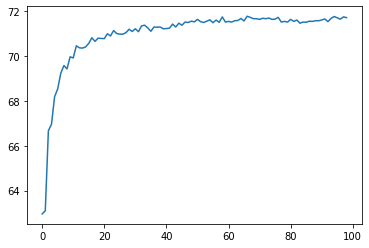

In [ ]:

x = []
for i in range(0,99):
  x.append(i)
plt.plot(x,Score)

#Building the knn model

In [ ]:

knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_test, Y_pred_knn)*100,2)

#Calculating the F1 Score of knn model

In [ ]:

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print('Precision: %.3f' % precision_score(  Y_test, Y_pred_knn))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_knn))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_knn))

The accuracy score achieved using KNN is: 70.98 %
Precision: 0.742
Recall: 0.637
F1 Score: 0.686


#Classification Report of KNN

In [ ]:

print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6787
           1       0.74      0.64      0.69      6702

    accuracy                           0.71     13489
   macro avg       0.71      0.71      0.71     13489
weighted avg       0.71      0.71      0.71     13489



#Building the SVC Linear Model

In [ ]:

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, Y_train)
Y_pred_svc_linear = svc_linear.predict(X_test)

#Accuracy of SVC Linear

In [ ]:

score_svc_linear = round(accuracy_score(Y_test , Y_pred_svc_linear)*100,2)
print("The accuracy score achieved using Linear SVC is: "+str(score_svc_linear)+" %")

The accuracy score achieved using Linear SVC is: 72.28 %


In [ ]:

print('Precision: %.3f' % precision_score(  Y_test, Y_pred_svc_linear ))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_svc_linear))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_svc_linear))

Precision: 0.778
Recall: 0.619
F1 Score: 0.689


#Classifiction Report 

In [ ]:

print(classification_report(Y_test, Y_pred_svc_linear))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      6787
           1       0.78      0.62      0.69      6702

    accuracy                           0.72     13489
   macro avg       0.73      0.72      0.72     13489
weighted avg       0.73      0.72      0.72     13489



In [ ]:
accuracy = {'LogisticRegression' : score_lr, 'knn' : score_knn, 'svc_linear'  : score_svc_linear}

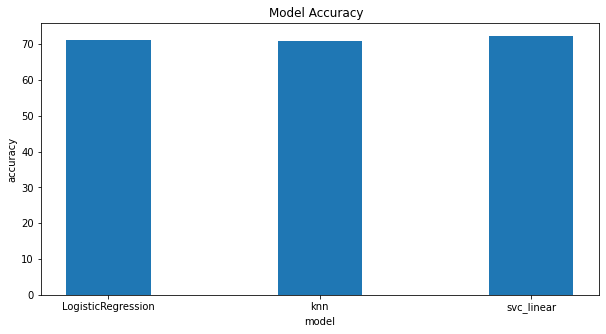

In [ ]:

model = list(accuracy.keys())
values = list(accuracy.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(model, values,width = 0.4)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("Model Accuracy  ")
plt.show()

#Building the SVC kernel = Polynomial

In [ ]:

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, Y_train)
Y_pred_svm_poly = svc_poly.predict(X_test)

#Accuracy 

In [ ]:

score_svc_poly = round(accuracy_score(Y_test,Y_pred_svm_poly)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svc_poly)+" %")

The accuracy score achieved using Linear SVM is: 71.64 %


In [ ]:

print('Precision: %.3f' % precision_score(  Y_test, Y_pred_svm_poly ))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_svm_poly))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_svm_poly))

Precision: 0.781
Recall: 0.597
F1 Score: 0.676


#Classification Report

In [ ]:
print(classification_report(Y_test, Y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      6787
           1       0.78      0.60      0.68      6702

    accuracy                           0.72     13489
   macro avg       0.73      0.72      0.71     13489
weighted avg       0.73      0.72      0.71     13489



#Building the SVC kernel = gaussian

In [ ]:

svc_gauss = SVC(kernel='rbf')
svc_gauss.fit(X_train, Y_train)
Y_pred_svc_gauss = svc_gauss.predict(X_test)

#Accuracy

In [ ]:

score_svc_gauss = round(accuracy_score(Y_test, Y_pred_svc_gauss)*100,2)
print("The accuracy score achieved using gaussian SVM is: "+str(score_svc_gauss)+" %")

The accuracy score achieved using gaussian SVM is: 71.27 %


In [ ]:

print('Precision: %.3f' % precision_score(  Y_test, Y_pred_svc_gauss ))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_svc_gauss))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_svc_gauss))

Precision: 0.775
Recall: 0.594
F1 Score: 0.673


#Classification Report

In [ ]:

print(classification_report(Y_test, Y_pred_svc_gauss))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      6787
           1       0.78      0.59      0.67      6702

    accuracy                           0.71     13489
   macro avg       0.72      0.71      0.71     13489
weighted avg       0.72      0.71      0.71     13489



#Building the SVC kernel = sigmoid

In [ ]:

svc_sigm = SVC(kernel='sigmoid')
svc_sigm.fit(X_train, Y_train)
Y_pred_svc_sigm = svc_sigm.predict(X_test)

#Accuracy

In [ ]:

score_svc_sigm = round(accuracy_score(Y_test, Y_pred_svc_sigm)*100,2)
print("The accuracy score achieved using sigmoid SVM is: "+str(score_svc_sigm)+" %")

The accuracy score achieved using sigmoid SVM is: 37.04 %


In [ ]:

print('Precision: %.3f' % precision_score(  Y_test, Y_pred_svc_sigm))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_svc_sigm))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_svc_sigm))

Precision: 0.364
Recall: 0.358
F1 Score: 0.361


#Classification Report

In [ ]:

print(classification_report(Y_test, Y_pred_svc_sigm))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38      6787
           1       0.36      0.36      0.36      6702

    accuracy                           0.37     13489
   macro avg       0.37      0.37      0.37     13489
weighted avg       0.37      0.37      0.37     13489



In [ ]:
accuracy = { 'svc_polynomial' : score_svc_poly , 'svc_gaussian' : score_svc_gauss , 'svc_sigmoid' : score_svc_sigm, 'svc_linear'  : score_svc_linear}

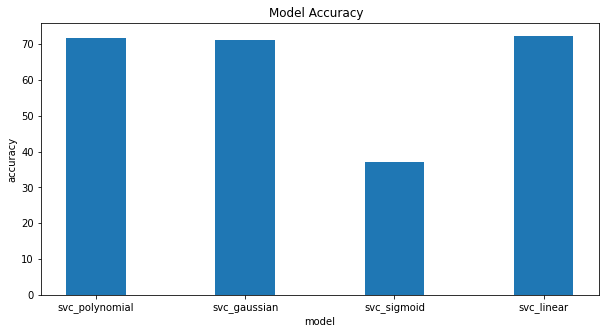

In [ ]:
#Accuracy graph of all the models
model = list(accuracy.keys())
values = list(accuracy.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(model, values,width = 0.4)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("Model Accuracy  ")
plt.show()

#importing tensor flow and keras

In [ ]:
import keras 
import tensorflow as tf
ann = tf.keras.models.Sequential()

#Building and training the ANN 1 model

In [ ]:

ann.add(tf.keras.layers.Dense(units=18, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, Y_train, batch_size = 32, epochs = 75)
ann_pred = ann.predict(X_test)

Epoch 1/75
1687/1687 [==============================] - 4s 2ms/step - loss: 2.0081 - accuracy: 0.6268
Epoch 2/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5992 - accuracy: 0.6913
Epoch 3/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6009 - accuracy: 0.6923
Epoch 4/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5974 - accuracy: 0.6932
Epoch 5/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6028 - accuracy: 0.6918
Epoch 6/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5927 - accuracy: 0.6996
Epoch 7/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5974 - accuracy: 0.6980
Epoch 8/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5947 - accuracy: 0.6980
Epoch 9/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5907 - accuracy: 0.7018
Epoch 10/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.592

#Accuracy of ANN 1 model

In [ ]:
score, acc = ann.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using ANN is:", acc*100)

1349/1349 [==============================] - 2s 1ms/step - loss: 0.5636 - accuracy: 0.7210
The accuracy score achieved using ANN is: 72.09578156471252


#Building and training the model using ANN 2

In [ ]:
import keras 
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=18, activation=keras.layers.LeakyReLU(alpha=0.01)))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, Y_train, batch_size = 32, epochs = 75)
ann_pred = ann.predict(X_test)

Epoch 1/75
1687/1687 [==============================] - 4s 2ms/step - loss: 0.6935 - accuracy: 0.5097
Epoch 2/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 3/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 4/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 5/75
1687/1687 [==============================] - 4s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 6/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 7/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 8/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5097
Epoch 9/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5090
Epoch 10/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.693

#Accuracy of ANN 2

In [ ]:
score, acc = ann.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using ANN is:", acc*100)

1349/1349 [==============================] - 2s 1ms/step - loss: 0.6935 - accuracy: 0.5032
The accuracy score achieved using ANN is: 50.315070152282715


 ANN3

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=18, activation='softmax'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, Y_train, batch_size = 32, epochs = 75)
ann_pred3 = ann.predict(X_test)

Epoch 1/75
1687/1687 [==============================] - 4s 2ms/step - loss: 0.6323 - accuracy: 0.6568
Epoch 2/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5869 - accuracy: 0.7088
Epoch 3/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5838 - accuracy: 0.7102
Epoch 4/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5824 - accuracy: 0.7108
Epoch 5/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5810 - accuracy: 0.7124
Epoch 6/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5789 - accuracy: 0.7148
Epoch 7/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5799 - accuracy: 0.7125
Epoch 8/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5774 - accuracy: 0.7145
Epoch 9/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7146
Epoch 10/75
1687/1687 [==============================] - 3s 2ms/step - loss: 0.576

#Accuracy

In [ ]:
score, acc = ann.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using ANN is:", acc*100)

1349/1349 [==============================] - 2s 1ms/step - loss: 0.5625 - accuracy: 0.7216
The accuracy score achieved using ANN is: 72.15508818626404


Reshaping the input


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform
from keras.optimizers import gradient_descent_v2
sgd = gradient_descent_v2.SGD(...)


CNN 1

#Building and training the model using sigmoid activation function



In [ ]:
model = Sequential()
model.add(Convolution1D(filters=32, kernel_size=3, input_shape=(13, 1), activation='sigmoid'))
model.add(Convolution1D(filters=16, kernel_size=1, activation='sigmoid'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='softmax'))

In [ ]:
#Testing the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model.fit(X_train, Y_train, epochs=10, batch_size=128)




Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.6942 - acc: 0.4903
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6939 - acc: 0.4903
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6938 - acc: 0.4903
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6937 - acc: 0.4903
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6936 - acc: 0.4903
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6935 - acc: 0.4903
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6935 - acc: 0.4903
Epoch 8/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6936 - acc: 0.4903
Epoch 9/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6933 - acc: 0.4903
Epoch 10/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6934 - acc: 0.4903


#Accuracy

In [ ]:
score, acc = model.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using cnn is:", acc*100)

1349/1349 [==============================] - 2s 2ms/step - loss: 0.6926 - acc: 0.4968
The accuracy score achieved using cnn is: 49.684929847717285


CNN 2

#Building the CNN2 model using tanh activation function


In [ ]:
#Building the CNN2 model using tanh activation function
model = Sequential()
model.add(Convolution1D(filters=32, kernel_size=3, input_shape=(13, 1), activation='tanh'))
model.add(Convolution1D(filters=16, kernel_size=1, activation='tanh'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='softmax'))

In [ ]:
#Testing the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model.fit(X_train, Y_train, epochs=10, batch_size=128)



Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6385 - acc: 0.4903
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.6125 - acc: 0.4903
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6013 - acc: 0.4903
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.6029 - acc: 0.4903
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5991 - acc: 0.4903
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.5924 - acc: 0.4903
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5894 - acc: 0.4903
Epoch 8/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5872 - acc: 0.4903
Epoch 9/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5867 - acc: 0.4903
Epoch 10/10
422/422 [==============================] - 2s 6ms/step - loss: 0.5879 - acc: 0.4903


In [ ]:
score, acc = model.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using cnn is:", acc*100)

1349/1349 [==============================] - 2s 2ms/step - loss: 0.5821 - acc: 0.4968
The accuracy score achieved using cnn is: 49.684929847717285


CNN 3


In [ ]:
#Building the CNN 3 model using elu activation function.
model = Sequential()
model.add(Convolution1D(filters=32, kernel_size=3, input_shape=(13, 1), activation='elu'))
model.add(Convolution1D(filters=16, kernel_size=1, activation='elu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='elu'))
model.add(Dense(1, activation='softmax'))

In [ ]:
#Testing the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model.fit(X_train, Y_train, epochs=10, batch_size=128)




Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.7230 - acc: 0.4903
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6137 - acc: 0.4903
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6040 - acc: 0.4903
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5983 - acc: 0.4903
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5950 - acc: 0.4903
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5918 - acc: 0.4903
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5915 - acc: 0.4903
Epoch 8/10
422/422 [==============================] - 3s 7ms/step - loss: 0.5896 - acc: 0.4903
Epoch 9/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5889 - acc: 0.4903
Epoch 10/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5864 - acc: 0.4903


In [ ]:
score, acc = model.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using CNN is:", acc*100)

1349/1349 [==============================] - 2s 2ms/step - loss: 0.5764 - acc: 0.4968
The accuracy score achieved using CNN is: 49.684929847717285


CNN 4

In [ ]:
#Building and training the CNN 4 Model
model = Sequential()
model.add(Convolution1D(filters=32, kernel_size=3, input_shape=(13, 1), activation='relu'))
model.add(Convolution1D(filters=16, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
model.fit(X_train, Y_train, epochs=10, batch_size=128)


Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.6628 - acc: 0.4903
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6102 - acc: 0.4903
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6040 - acc: 0.4903
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5999 - acc: 0.4903
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5957 - acc: 0.4903
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5940 - acc: 0.4903
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5929 - acc: 0.4903
Epoch 8/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5912 - acc: 0.4903
Epoch 9/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5895 - acc: 0.4903
Epoch 10/10
422/422 [==============================] - 2s 6ms/step - loss: 0.5875 - acc: 0.4903


In [ ]:
score, acc = model.evaluate(X_test,Y_test,batch_size=10)
print("The accuracy score achieved using CNN is:", acc*100)

1349/1349 [==============================] - 2s 2ms/step - loss: 0.5973 - acc: 0.4968
The accuracy score achieved using CNN is: 49.684929847717285


In [ ]:
accuracy = {'LogisticRegression' : score_lr, 'knn' : score_knn, 'svc_polynomial' : score_svc_poly , 'svc_gaussian' : score_svc_gauss , 'svc_sigmoid' : score_svc_sigm, 'svc_linear'  : score_svc_linear, 'ANN' :72 , 'CNN' : 50}

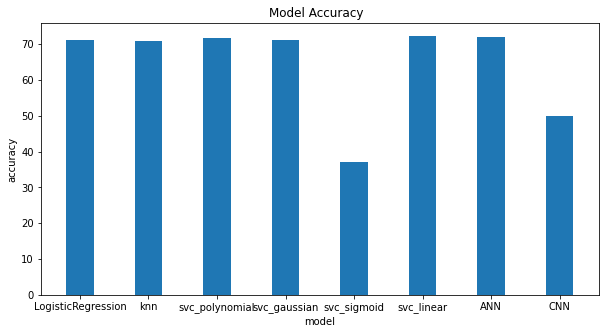

In [ ]:
#Accuracy graph of all the models
model = list(accuracy.keys())
values = list(accuracy.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(model, values,width = 0.4)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("Model Accuracy  ")
plt.show()

#Pickle

In [ ]:
#Importing the picle library
import pickle

In [ ]:
pickle.dump(svc_linear, open('Heartmodel.pkl' , 'wb'))

In [ ]:
#loaing the model
loaded_model = pickle.load(open('Heartmodel.pkl', 'rb'))


#Prediction

In [ ]:
input_data = (57,1,168,62.0,110,80,1,0,1,0,0,0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = loaded_model.predict(input_reshape)
print(prediction)


[0]


In [ ]:
if (prediction[0]==0):
  print('The person does not heart disease')
else:
  print('The person has heart disease')

The person does not heart disease
